# Assignment 2: Voting Visualized

## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.
- Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything. 

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [1]:
# Authors: Ahmed Saadallah, Jessica Lanini, Neeraj Yadav

# Put your imports here.
import json
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_folder = './data/'

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

A) Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON data/ch-cantons.topojson.json that contains the borders of the cantons.

In [3]:
# Visualize the map of Switzerland 
topo_json_path = data_folder + 'ch-cantons.topojson.json'
topo_json_data = json.load(open(topo_json_path))
m_switzerland = folium.Map([46.8182, 8.2275],tiles='cartodbpositron', zoom_start=8)
m_switzerland

In [4]:
# Add cantonal borders to the map
folium.TopoJson(
    open(topo_json_path),
    object_path='objects.cantons',
).add_to(m_switzerland)
m_switzerland

B) Take the spreadsheet data/communes_pop.xls, collected from admin.ch, containing population figures for every commune. You can use pd.read_excel() to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

We chose to build a different dataframe for each attribute. We will only be using the excel sheet of 2017 as required.

In [5]:
xls = pd.ExcelFile(data_folder +'communes_pop.xls')
population_df = pd.read_excel(xls, '2017')
years = xls.sheet_names # span of sheets in the excel file
population_df.head(30)

,su-f-01.02.04.07,"Bilan de la population résidante permanente selon les districts et les communes, en 2017",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Composantes de l'évolution de la population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Variation,NaN
2,NaN,Etat de la,Naissances,Décès,Accroissement,Arrivées 1),Départs,Solde,Divergences,Etat de la,en nombres,en %
3,NaN,population,vivantes,NaN,naturel,NaN,NaN,migratoire 1),statistiques,population,absolus,NaN
4,NaN,au 1er janvier,NaN,NaN,NaN,NaN,NaN,NaN,,au 31 décembre,NaN,NaN
5,Suisse 2),8419550,87381,66971,20410,681011,635063,45948,-1778,8484130,64580,0.767024
6,- Zürich,1487969,17070,11076,5994,120593,108666,11927,-1544,1504346,16377,1.10063
7,>> Bezirk Affoltern,52904,517,310,207,4501,3862,639,21,53771,867,1.63882
8,......0001 Aeugst am Albis,1977,10,7,3,129,165,-36,-3,1941,-36,-1.82094
9,......0002 Affoltern am Albis,11900,128,93,35,1239,1029,210,1,12146,246,2.06723


In [6]:
population_df = pd.read_excel(xls, '1995')
population_df.head(30)

,su-f-01.02.04.07,Unnamed: 1,"Bilan de la population résidante permanente selon les districts et les communes, en 1995",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Etat de la,Naissances,Décès,Accroissement,Arrivées et,Départs,Solde,Divergences,Etat de la,Variation,NaN
2,NaN,NaN,population,vivantes,NaN,naturel,changements,NaN,migratoire et,statistiques,population,en nombres,en %
3,NaN,NaN,au 1er janvier,NaN,NaN,NaN,de statut,NaN,changements,,au 31 décembre,absolus,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de statut,NaN,NaN,NaN,NaN
5,Suisse,NaN,7019019,82203,63387,18816,550158,535700,14458,10061,7062354,43335,0.6
6,Kanton Zürich,NaN,1168567,12809,10839,1970,93157,90391,2766,2154,1175457,6890,0.6
7,Bezirk Affoltern,NaN,37845,493,208,285,3577,3150,427,66,38623,778,2.1
8,1,Aeugst am Albis,1351,15,5,10,143,118,25,0,1386,35,2.6
9,2,Affoltern am Albis,9245,124,57,67,792,779,13,26,9351,106,1.1


In [7]:
# Check the different shapes of every excel sheet
# Filtering will depend on this
for year in years:
    population_df = pd.read_excel(xls,year)
    print ('For year '+year+' the dataframe shape is: '+str(population_df.shape))

For year 2017 the dataframe shape is: (2419, 12)
For year 2016 the dataframe shape is: (2466, 12)
For year 2015 the dataframe shape is: (2503, 12)
For year 2014 the dataframe shape is: (2532, 12)
For year 2013 the dataframe shape is: (2576, 12)
For year 2012 the dataframe shape is: (2664, 12)
For year 2011 the dataframe shape is: (2695, 12)
For year 2010 the dataframe shape is: (2776, 14)
For year 2009 the dataframe shape is: (2830, 14)
For year 2008 the dataframe shape is: (2909, 14)
For year 2007 the dataframe shape is: (2923, 14)
For year 2006 the dataframe shape is: (2928, 12)
For year 2005 the dataframe shape is: (2928, 12)
For year 2004 the dataframe shape is: (2928, 12)
For year 2003 the dataframe shape is: (2928, 12)
For year 2002 the dataframe shape is: (2928, 12)
For year 2001 the dataframe shape is: (2928, 12)
For year 2000 the dataframe shape is: (2928, 12)
For year 1999 the dataframe shape is: (2972, 13)
For year 1998 the dataframe shape is: (2972, 13)
For year 1997 the da

   The format of the data changed in 2000 so that the column of the canton and district also contains the commune.
   In 2007 to 2010, we have two additional columns full of NaNs that we filter.

In [8]:
# We have to arrange every dataframe   
def adjust_df(df,year):
    new_df = df.copy()
    new_df = new_df.drop(df.index[[0,1,2,3,4]])
    if int(year) in np.arange(2007,2011):
        new_df = new_df.drop(['Unnamed: 12','Unnamed: 13'],axis=1)
        
    if int(year)<2000:
        new_df.columns = ['Canton/District', 'Commune','Population-Jan','Naissances-vivantes','Décès','Accroissement','Arrivées','Départs',
                          'Solde-migratoire','Divergences','Popuation-Dec','Variation-absolue','Variation-%']
    else:
        new_df.columns = ['Canton/District/Commune','Population-Jan','Naissances-vivantes','Décès','Accroissement','Arrivées','Départs',
                     'Solde-migratoire','Divergences','Popuation-Dec','Variation-absolue','Variation-%']
    #new_df=new_df.dropna() #filter the tail of the dataframe
    new_df= new_df[pd.notnull(new_df['Population-Jan'])]
    
    return new_df

In [9]:
dfs = []
for year in years:
    population_df = pd.read_excel(xls,year)
    population_df = adjust_df(population_df,year)
    dfs.append(population_df)
# we have a list of dataframes dfs containing dataframes that look like population_df   
# Each dataframe is dedicated for the data of specific year.
population_df.tail()

,Canton/District,Commune,Population-Jan,Naissances-vivantes,Décès,Accroissement,Arrivées,Départs,Solde-migratoire,Divergences,Popuation-Dec,Variation-absolue,Variation-%
2963,6802,Roche-d'Or,56,2,0,2,8,10,-2,0,56,0,0
2964,6803,Rocourt,156,0,2,-2,0,2,-2,0,152,-4,-2.6
2965,6804,Saint-Ursanne,729,10,7,3,76,54,22,0,754,25,3.4
2966,6805,Seleute,86,0,2,-2,0,3,-3,0,81,-5,-5.8
2967,6806,Vendlincourt,589,8,8,0,37,42,-5,0,584,-5,-0.8


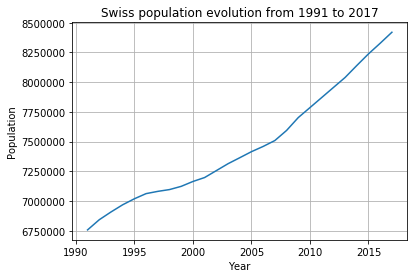

In [10]:
# Overall Swiss population evolution from 1991 to 2017
total_populations_Jan = [df['Population-Jan'].iloc[0] for df in dfs]
total_populations_Jan
plt.plot(years,total_populations_Jan)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Swiss population evolution from 1991 to 2017')
plt.show()

To compare the population distribution across rural and urban communes we have first to classify the communes.
According to wikipedia, an urban area is caracterized by its high population density. We will be using this criterion to distinguish a rural commune from an urban none. We establish a threshold consisting of the total population of Switzerland divided by the total number of communes. Above this threshold, a given commune is considered urban. According to wikipedia this threshold is around 10 000 inhabitants.

In [11]:
# function used to take out the communes ffrom the district and canton labels. All communes labels and the country label contain a number
def hasNumbers(inputString):
     return any(char.isdigit() for char in inputString if 'Suisse' not in inputString)

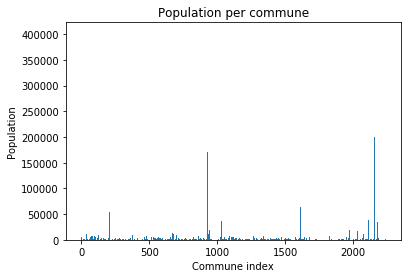

In [12]:
# Get the population of every commune and store it in all_pops
all_pops = dfs[0][(dfs[0]['Canton/District/Commune'].apply(hasNumbers))]['Population-Jan']
plt.bar(np.arange((len(all_pops))),all_pops)
plt.xlabel('Commune index')
plt.ylabel('Population')
plt.title('Population per commune')
plt.show()

In [13]:
print('The total number of communes in 2017 is: '+str(len(all_pops)))
print('Which is in accordance with the numbers indicated in the Swiss commune' +
      ' wikipedia page https://fr.wikipedia.org/wiki/Commune_(Suisse)')

The total number of communes in 2017 is: 2240
Which is in accordance with the numbers indicated in the Swiss commune wikipedia page https://fr.wikipedia.org/wiki/Commune_(Suisse)


To distinguish rural communes from urban ones we used the population criterion in the link referenced above. We therefore call rural communes those with a population below 10000 and urban ones with a population equal or superior to 10000.
We use the population values in the January only as the fluctuation during the year is negligeable as you can see in the following curve.

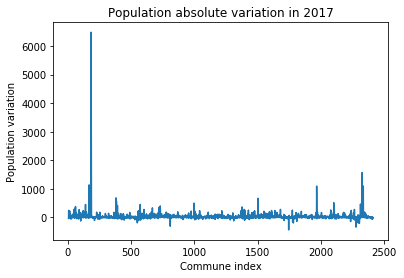

In [14]:
plt.plot((dfs[0][(dfs[0]['Canton/District/Commune'].apply(hasNumbers))]['Variation-absolue']))
plt.xlabel('Commune index')
plt.ylabel('Population variation')
plt.title('Population absolute variation in 2017')
plt.show()

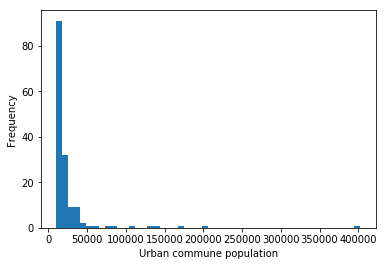

In [15]:
urban_pops = dfs[0][(dfs[0]['Canton/District/Commune'].apply(hasNumbers)) & 
                     (dfs[0]['Population-Jan']>10000) ]['Population-Jan']
plt.hist(urban_pops,bins=50)
plt.xlabel('Urban commune population')
plt.ylabel('Frequency')
plt.show()

Based on the histogram above, we can say that a few urban communes have a population above 50000. We therefore search for the name of these outliers

In [16]:
urban_outliers = dfs[0][(dfs[0]['Canton/District/Commune'].apply(hasNumbers)) & 
                     (dfs[0]['Population-Jan']>50000) ]
def removeDigits(s):
    commune = ''.join([i for i in s if (not i.isdigit()) & (i!='.')])
    return commune

outliers_communes = urban_outliers['Canton/District/Commune'].apply(removeDigits).values
print('The following communes have a population superior to 50000 '+str(outliers_communes))


The following communes have a population superior to 50000 [' Winterthur' ' Zürich' ' Biel/Bienne' ' Bern' ' Luzern' ' Basel'
 ' St Gallen' ' Lugano' ' Lausanne' ' Genève']


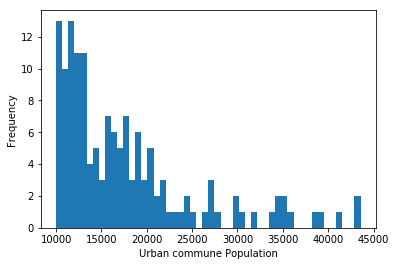

In [17]:
# Have a look at the distubtion of the bulk of the urban communes. These communes have a population between 10000 and 50000
urban_pops = dfs[0][(dfs[0]['Canton/District/Commune'].apply(hasNumbers)) & 
                     (dfs[0]['Population-Jan']>10000) & (dfs[0]['Population-Jan']<50000) ]['Population-Jan']
plt.hist(urban_pops,bins=50)
plt.xlabel('Urban commune Population')
plt.ylabel('Frequency')
plt.show()

To summarize, we can see in the histograms above that a small number of urban communes have a relatively larger number of inhabitants. Looking at the names of these communes, we can find the names of all major Swiss cities. Most of the urban communes have a population under 25000.

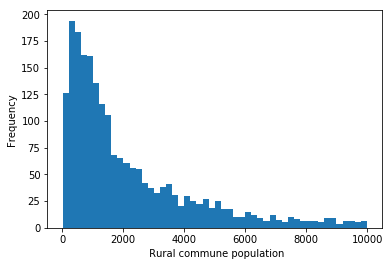

In [18]:
rural_pops = dfs[0][(dfs[0]['Canton/District/Commune'].apply(hasNumbers)) & 
                     (dfs[0]['Population-Jan']<=10000) ]['Population-Jan']
plt.hist(rural_pops,bins=50)
plt.xlabel(' Rural commune population')
plt.ylabel('Frequency')
plt.show()

For the rural communes, we can see that a majority of them have populations under 4000. There aren't clear outliers in this case. We list below the communes with populations above 9000 and under 10000.

In [19]:
rural_outliers = dfs[0][(dfs[0]['Canton/District/Commune'].apply(hasNumbers)) & 
                     (dfs[0]['Population-Jan']>9000) & (dfs[0]['Population-Jan']<10000)]
def removeDigits(s):
    commune = ''.join([i for i in s if (not i.isdigit()) & (i!='.')])
    return commune

outliers_communes = rural_outliers['Canton/District/Commune'].apply(removeDigits).values
print('The following communes have a population superior to 9000 and inferior to 10000 '+str(outliers_communes))

The following communes have a population superior to 9000 and inferior to 10000 [' Embrach' ' Niederhasli' ' Gossau (ZH)' ' Wald (ZH)' ' Urdorf'
 ' Langnau im Emmental' ' Wohlen bei Bern' ' Hochdorf' ' Sursee'
 ' Altdorf (UR)' ' Schübelbach' ' Glarus Süd' ' Steinhausen' ' Estavayer'
 ' Arlesheim' ' Wittenbach' ' Goldach' ' Rorschach' ' Widnau'
 ' Eschenbach (SG)' ' Suhr' ' Lenzburg' ' Aigle' ' Payerne' ' Epalinges'
 ' Lutry' ' Naters']


C) The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent power-laws is to use a histogram using a log-log scale -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.

Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

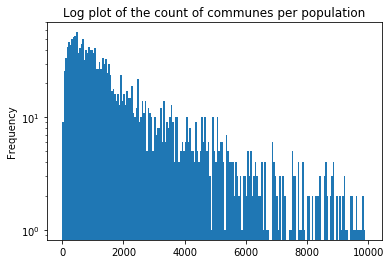

In [20]:
# Small size bins introducing artifacts similar to figure B
bins = np.arange(0,10000,50) #bins
ax = all_pops.plot(kind ='hist',bins=bins)
ax.set_title('Log plot of the count of communes per population')
ax.set_yscale('log')
plt.show()

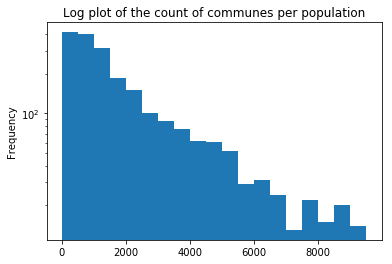

In [21]:
# Big size bins introducing artifacts similar to figure C
bins = np.arange(0,10000,500) #bins
ax = all_pops.plot(kind ='hist',bins=bins)
ax.set_title('Log plot of the count of communes per population')
ax.set_yscale('log')
plt.show()

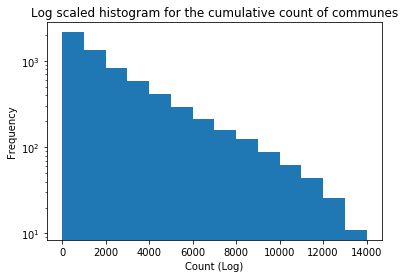

In [22]:
#
bins = np.arange(0,15000,1000) #bins
ax = all_pops.plot(kind ='hist',bins=bins,cumulative = -1)
ax.set_title('Log scaled histogram for the cumulative count of communes')
ax.set_xlabel('Population (Log)')
ax.set_xlabel('Count (Log)')
ax.set_yscale('log')
plt.show()

From the last plot, we can see that there is a linear relationship between the total number of communes with a population superior to a given number which means there is power law that relates these two quantities up to a certain point. 
If we denote the linear curve by: 
$$ y = kx +c $$
Where y is the total count of communes with a population superior to a population x then we can write :
$$ \log(y)=k\log(x)+\log(a)$$
and applying exp to both sides yeields :
$$ y=ax^k$$

Since k is negative (k is the curve slope), the cumulative count of populations decreases exponentially with the population size.
We can also for relatively very large populations, the slope goes down even further which highlights the small number of urban communes outliers we've talked about previously.

## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

## A

In [23]:
voters = os.path.join(data_folder,'voters.xls')    #define the path of data     
voters_df = pd.read_excel(voters,index=False)      # read the data

'''
remove all the meaningless rows for which year is not defined (these rows were not part of the table but they contain
text present below the table), so this  just extracts the entities of table
'''
voters_df = voters_df[voters_df['Unnamed: 2'].notnull()]

# remove all the columns which have all entities null (caused due to format of file which have fully empty columns)
voters_df.dropna(how='all',axis=1,inplace=True) 
 
#voters_df = voters_df.dropna(thresh=3,axis=1)  remove the parties with representation < 3 cantons

#rename the columns by the name of political parties
voters_df = voters_df.rename(columns = voters_df.iloc[0])

#rename the column from nan to 'canton'
voters_df = voters_df.rename(index=str, columns={np.nan:'canton'})

#drop the first row containing political parties names
voters_df = voters_df[1:]

#fill the nan values by zero, denoting party has zero vote bank in that canton
voters_df =voters_df.fillna(0)

#create a new dataframe containing cantons and vote bank of UDC party 
new_df = pd.DataFrame()
new_df['canton'] = voters_df['canton']
new_df['UDC'] = voters_df['UDC']


In [24]:
topo_json_data = json.load(open(topo_json_path))
# extract cantons abbreviations from json data
cantons = [topo_json_data['objects']['cantons']['geometries'][i]['id'] 
           for i in range(len(topo_json_data['objects']['cantons']['geometries']))]

# replace canton names by their respective abbreviations in the order they are mentioned in the constitution
new_df['canton'] = cantons
new_df.reset_index(drop=True,inplace=True)
new_df

,canton,UDC
0,ZH,30.023215
1,BE,26.760869
2,LU,24.115646
3,UR,24.053191
4,SZ,33.115090
5,OW,24.532303
6,NW,25.916631
7,GL,25.275361
8,ZG,23.631802
9,FR,19.717606


In [25]:
topo_json_path = data_folder + 'ch-cantons.topojson.json'
topo_json_data = json.load(open(topo_json_path))

# create new empty map zoomed in Switzerland
m_switzerland = folium.Map([46.8182, 8.2275],tiles='cartodbpositron', zoom_start=8)

# Add percentage of UDC voters to map
m_switzerland.choropleth(geo_data=open(topo_json_path),topojson='objects.cantons', data=new_df,
             columns=['canton', 'UDC'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Percentage of voters who voted for UDC (%)')

m_switzerland

Obviously the percentage of UDC voters in the swiss german part is much higher than all other regions in Switzerland. As we can see that the color density is higher in the region near Zurich, hence we conclude that UDC has a strong base in the German speaking part.

For Appenzell Inn and Graubunden the data is missing, so we put the percentage of voters at 0. 

## B 

To get total number of people who voted for UDC in each canton, we look at the number of people who actually voted in a particular canton and then multiply it with the percentage of votes gained by the UDC.

In [26]:
voters_df['canton'] = cantons
voters_df.reset_index(drop=True) # For  task 3

elections = os.path.join(data_folder,'national_council_elections.xlsx')
elections_df = pd.read_excel(elections)

# drop first 8 rows containing  textual data
elections_df = elections_df.drop(elections_df.index[[0,1,2,3,4,5,6,7]])

#assign column meaningful names
elections_df.columns = ['canton','registred voters','voters','participation %']

#drop the nan values
elections_df = elections_df.dropna().reset_index(drop=True)

#replace canton names by abbreviations
elections_df['canton'] = cantons

#calculate the number of voters of UDC
elections_df['UDC voters'] = (elections_df['voters'].values *new_df['UDC'].values*0.01).astype(int)
elections_df

,canton,registred voters,voters,participation %,UDC voters
0,ZH,907623,428837,47.2484,128750
1,BE,729203,357770,49.0632,95742
2,LU,271143,138096,50.9311,33302
3,UR,26414,15091,57.1326,3629
4,SZ,102145,54857,53.705,18165
5,OW,26244,15617,59.5069,3831
6,NW,30810,17971,58.3285,4657
7,GL,26268,10890,41.4573,2752
8,ZG,74803,40200,53.7412,9499
9,FR,196027,92462,47.168,18231


In [27]:
# create new empty map zoomed in Switzerland
m_switzerland2 = folium.Map([46.8182, 8.2275],tiles='cartodbpositron', zoom_start=8)

#Add voters of UDC party to map
m_switzerland2.choropleth(geo_data=open(topo_json_path),topojson='objects.cantons', data=elections_df,
             columns=['canton', 'UDC voters'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Number of voters who voted for UDC')

m_switzerland2

# C

For a cantonal election, it makes senses to have the percentages of the party voters per canton and therefore the first map would be more useful. If they have a high voters percentage at a given canton then they would know that their chances of winning the elections of that canton is high. In case of a nation wide election where the party has to get the majority vote, they should then focus on the number of voters per canton. This would allow them to better know where their voters base located and show them where they should compaign more and which cantons they should target in order to improve their numbers. Ultimately, the percentages of voters per canton is also important since the nation wide vote is the aggregate of the number of voters in each canton but since the population of different cantons varies, getting the absolute number of voters is more informative.

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

## Part A

__A)__ In this part we are going first to compute the *right_lean* parameter and then we will visualize it on the map

In [28]:
voters_df.head()

,canton,Année électorale 2),Participation,PLR 6),PDC 7),PS,UDC,Dém.,PLS 6),AdI,...,PSL,Lega,MCR,LS,JB,Front,Grut,Autres 11),K,Total
5,ZH,2015,32.652497,17.327820,4.878712,19.716444,30.023215,0,0.0,0,...,0,0.0,0.0,0,0,0,0,0.669707,0,100
6,BE,2018,30.516313,11.717910,0.671415,22.328775,26.760869,0,0.0,0,...,0,0.0,0.0,0,0,0,0,0.912781,0,100
7,LU,2015,38.741267,21.039516,30.862513,11.848915,24.115646,0,0.0,0,...,0,0.0,0.0,0,0,0,0,0.036129,0,100
8,UR,2016,61.989056,26.856698,31.298814,12.984966,24.053191,0,0.0,0,...,0,0.0,0.0,0,0,0,0,2.428270,0,100
9,SZ,2016,37.747088,21.628996,27.167707,12.925363,33.115090,0,0.0,0,...,0,0.0,0.0,0,0,0,0,1.513578,0,100


In [29]:
# Computation of the right_lean
voters_PS = voters_df["PS"]
voters_UDC = voters_df["UDC"]
right_lean = (voters_UDC-voters_PS)/(voters_UDC+voters_PS)
voters_df["right_lean"] = right_lean

In [30]:
# Visualization 
m_switzerland_rl = folium.Map([46.8182, 8.2275],tiles='cartodbpositron', zoom_start=8)
m_switzerland_rl.choropleth(geo_data=open(topo_json_path),topojson='objects.cantons', data=voters_df,
             columns=['canton', 'right_lean'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='right_lean')
m_switzerland_rl

From the visualization of the right lean of each canton on the map one can see how there is an homogeneous distribution of such a value going from the left to the right of the Switzerland map. On the left (french part) the right lean value is highly negative, showing a clear tendency of this area to be closer to the PS party. While moving to the right we can evaluate how the right lean tends to be more and more positive, which means that the PS and the UDC party have similar percentage of votes, expecially in the middle regions of Switzerland. In the german side (more on the right) the UDC party is more popular than the PS one. For the mentioned reasons the röstigraben is really well represented!

## Part B)

__B)__ In this part we are going to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. We propose two methods: a first visualization on the map with an interactive slider that shows the changing of the percentage difference between the PC and UDC parties in the years ranges 2010-2013 and 2014-2018 and an interactive stacked bar chart of the weighted percentage of the two main parties during the same years ranges.
Both visualizations use a widget and since the widgets don't render without running the notebook, we also included a static visualization of each.

In [31]:
#Extraction of data from 2010-2013
voters_df_2014_2018 = voters_df
voters_df_2010_2013 = pd.read_excel(voters, '2010-2013', index=False)

In [32]:
#Arranging dataframe
voters_df_2010_2013 = voters_df_2010_2013[voters_df_2010_2013['Unnamed: 2'].notnull()]
voters_df_2010_2013.dropna(how='all',axis=1,inplace=True)
voters_df_2010_2013 = voters_df_2010_2013.dropna(thresh=3,axis=1)
voters_df_2010_2013 = voters_df_2010_2013.rename(columns = voters_df_2010_2013.iloc[0])
voters_df_2010_2013 = voters_df_2010_2013.rename(index=str, columns={np.nan:'canton'})
voters_df_2010_2013 = voters_df_2010_2013[1:]
voters_df_2010_2013 =voters_df_2010_2013.fillna(0)
voters_df_2010_2013['canton'] = cantons
voters_df_2010_2013.reset_index(drop=True).head() 

,canton,Année électorale,Participation,PLR 7),PDC,PS,UDC,PLS 7),PEV,PCS,...,PBD,PST,PES,AVF 8),Sol.,DS,UDF,MCR,Autres 10),Total
0,ZH,2011,38.2347,12.934426,4.862598,19.317182,29.635552,0.0,3.778014,0.0,...,3.465970,0.0,10.569400,1.627417,0.0,0.405206,2.571601,0.0,0.567131,100
1,BE,2010,32.3464,10.335474,1.256537,18.852832,26.621577,0.0,5.898273,0.0,...,16.027757,0.0,10.101410,0.000000,0.0,0.414800,4.403570,0.0,0.977237,100
2,LU,2011,43.469,18.864849,31.298184,10.964228,22.126508,0.0,0.000000,0.0,...,1.661765,0.0,8.668342,0.000000,0.0,0.000000,0.000000,0.0,0.511289,100
3,UR,2012,49.1591,20.281885,36.611083,12.085318,24.629866,0.0,0.000000,0.0,...,0.000000,0.0,3.892682,0.000000,0.0,0.000000,0.000000,0.0,2.499166,100
4,SZ,2012,45.114,22.818461,29.083853,12.381160,34.004523,0.0,0.000000,0.0,...,0.030112,0.0,0.189013,0.000000,0.0,0.000000,0.000000,0.0,1.492877,100


In [33]:
# Computation of the percentage differences of the UDC and PS parties in years ranges 2010_2013 and 2014_2018
diff_UDC_PS = (voters_df_2010_2013['UDC']-voters_df_2010_2013['PS'])
voters_df_2010_2013["diff_UDC_PS"] = diff_UDC_PS
diff_UDC_PS = (voters_df_2014_2018['UDC']-voters_df_2014_2018['PS'])
voters_df_2014_2018["diff_UDC_PS"] = diff_UDC_PS

In [34]:
voters_df_2014_2018.head()

,canton,Année électorale 2),Participation,PLR 6),PDC 7),PS,UDC,Dém.,PLS 6),AdI,...,MCR,LS,JB,Front,Grut,Autres 11),K,Total,right_lean,diff_UDC_PS
5,ZH,2015,32.652497,17.327820,4.878712,19.716444,30.023215,0,0.0,0,...,0.0,0,0,0,0,0.669707,0,100,0.207214,10.306771
6,BE,2018,30.516313,11.717910,0.671415,22.328775,26.760869,0,0.0,0,...,0.0,0,0,0,0,0.912781,0,100,0.090286,4.432095
7,LU,2015,38.741267,21.039516,30.862513,11.848915,24.115646,0,0.0,0,...,0.0,0,0,0,0,0.036129,0,100,0.341078,12.266731
8,UR,2016,61.989056,26.856698,31.298814,12.984966,24.053191,0,0.0,0,...,0.0,0,0,0,0,2.428270,0,100,0.298833,11.068224
9,SZ,2016,37.747088,21.628996,27.167707,12.925363,33.115090,0,0.0,0,...,0.0,0,0,0,0,1.513578,0,100,0.438521,20.189727


In [35]:
voters_df_2010_2013.head()

,canton,Année électorale,Participation,PLR 7),PDC,PS,UDC,PLS 7),PEV,PCS,...,PST,PES,AVF 8),Sol.,DS,UDF,MCR,Autres 10),Total,diff_UDC_PS
5,ZH,2011,38.2347,12.934426,4.862598,19.317182,29.635552,0.0,3.778014,0.0,...,0.0,10.569400,1.627417,0.0,0.405206,2.571601,0.0,0.567131,100,10.318369
6,BE,2010,32.3464,10.335474,1.256537,18.852832,26.621577,0.0,5.898273,0.0,...,0.0,10.101410,0.000000,0.0,0.414800,4.403570,0.0,0.977237,100,7.768744
7,LU,2011,43.469,18.864849,31.298184,10.964228,22.126508,0.0,0.000000,0.0,...,0.0,8.668342,0.000000,0.0,0.000000,0.000000,0.0,0.511289,100,11.162280
8,UR,2012,49.1591,20.281885,36.611083,12.085318,24.629866,0.0,0.000000,0.0,...,0.0,3.892682,0.000000,0.0,0.000000,0.000000,0.0,2.499166,100,12.544548
9,SZ,2012,45.114,22.818461,29.083853,12.381160,34.004523,0.0,0.000000,0.0,...,0.0,0.189013,0.000000,0.0,0.000000,0.000000,0.0,1.492877,100,21.623363


In [36]:
# Interactive Map visualizing the diff_UDC_PS for the two years ranges

import matplotlib.pyplot as plt
from ipywidgets import *
np.seterr(divide='ignore', invalid='ignore')
voters_df_tmp = pd.DataFrame()

def pltsin(period):
    if(period =='2010_2013'):
        voters_df_tmp = voters_df_2010_2013
        title = 'Weighted percentage of votes years 2010-2013'
        m_switzerland_r1 = folium.Map([46.8182, 8.2275],tiles='cartodbpositron', zoom_start=8)
        m_switzerland_r1.choropleth(geo_data=open(topo_json_path),topojson='objects.cantons', data=voters_df_tmp,
             columns=['canton', 'diff_UDC_PS'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='UDC - PS % in 2012-2013')
        #inline_map(m_switzerland_r1)
        iframe = m_switzerland_r1._repr_html_()
    
        display(HTML(iframe))
        del(iframe)
        del(m_switzerland_r1)
    else:
        voters_df_tmp = voters_df_2014_2018
        title = 'Weighted percentage of votes years 2014-2018'
        m_switzerland_r2 = folium.Map([46.8182, 8.2275],tiles='cartodbpositron', zoom_start=8)
        m_switzerland_r2.choropleth(geo_data=open(topo_json_path),topojson='objects.cantons', data=voters_df_tmp,
                 columns=['canton', 'diff_UDC_PS'],
                 key_on='feature.id',
                 fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
                 legend_name='UDC - PS % in 2014-2018')
        #inline_map(m_switzerland_r2)
        iframe = m_switzerland_r2._repr_html_()
        display(HTML(iframe))
        del(iframe)
        del(m_switzerland_r2)
    
#interact(pltsin, year_range=(1, 2, 1)) 
interact(pltsin, period=['2010_2013', '2014_2018']) 


A Jupyter Widget

<function __main__.pltsin>

If the interactive visualization is not properly shown please find below the two main plots that are related to each year range.

In [37]:
# Visualization of the diff_UDC_PS in years range 2010_2013

voters_df_tmp = voters_df_2010_2013
title = 'Weighted percentage of votes years 2010-2013'
m_switzerland_r1 = folium.Map([46.8182, 8.2275],tiles='cartodbpositron', zoom_start=8)
m_switzerland_r1.choropleth(geo_data=open(topo_json_path),topojson='objects.cantons', data=voters_df_tmp,
     columns=['canton', 'diff_UDC_PS'],
     key_on='feature.id',
     fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
     legend_name='UDC - PS % in 2012-2013)')
m_switzerland_r1

In [38]:
# Visualization of the diff_UDC_PS in years range 2014_2018

voters_df_tmp = voters_df_2014_2018
title = 'Weighted percentage of votes years 2014-2018'
m_switzerland_r2 = folium.Map([46.8182, 8.2275],tiles='cartodbpositron', zoom_start=8)
m_switzerland_r2.choropleth(geo_data=open(topo_json_path),topojson='objects.cantons', data=voters_df_tmp,
         columns=['canton', 'diff_UDC_PS'],
         key_on='feature.id',
         fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
         legend_name='UDC - PS % in 2014-2018')
m_switzerland_r2

One can see that during the years the UDC party tends to grow especially in the german part.

ractive slider allows the reader to manually check the variation of each party voters through the years.

In order to represent the evolution over time of the percentage of votes of the two main parties, which are the UDC and teh PS, we decided to also use an interactive stacked bar chart. In particular we decided to report a weighted percentage, defined as follows:
$$WeightedVoteShare_{UDC}=(\frac{VoteShare_{UDC}}{VoteShare_{UDC} + VoteShare_{PS}})*100,$$


$$WeightedVoteShare_{PS}=(\frac{VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}})*100.$$

In this way it is possible to better visualize the dominance of one party against the other without taking into account the other parties contribution.
The stacked bar chart give us the possibility to stack the results of each party represented with two different colors, blue for the UDC party and orange for the PS party. Moreover the interactive slider allows the reader to manually check the variation of each party voters through the years. 

In [39]:
# Interactive stacked bar chart
import matplotlib.pyplot as plt
from ipywidgets import *
np.seterr(divide='ignore', invalid='ignore')

def pltsin(period):
    if(period =='2010_2013'):
        df = voters_df_2010_2013
        title = 'Weighted percentage of votes years 2010-2013'
    else:
        df = voters_df_2014_2018
        title = 'Weighted percentage of votes years 2014-2018'
            
    cantons = df['canton'].values
    UDC = (df['UDC'].values/(df['UDC'].values+df['PS'].values))*100
    PS = (df['PS'].values/(df['UDC'].values+df['PS'].values))*100
    # plot
    plt.figure(figsize=(15, 9))
    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)   
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    ax.set_ylim(0, 100)
    barWidth = 0.85
    names = []
    for canton in voters_df_2010_2013['canton'].values:
        names.append(canton)
    #
    plt.bar(np.arange(len(cantons)), UDC, label='UDC')
    plt.bar(np.arange(len(cantons)), PS, bottom=UDC, label='PS')

    # Custom x axis
    plt.xlabel("Cantons", fontsize=20)
    plt.xticks(np.arange(len(cantons)),cantons)
    plt.legend(loc='upper right', fontsize=18)
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=20)

    # Show graphic
    plt.show()
interact(pltsin,period = ['2010_2013', '2014_2018'])

A Jupyter Widget

<function __main__.pltsin>

Also in this last visualization if the interactive visualization is not properly shown please find below the two main plots that are related to each year range.

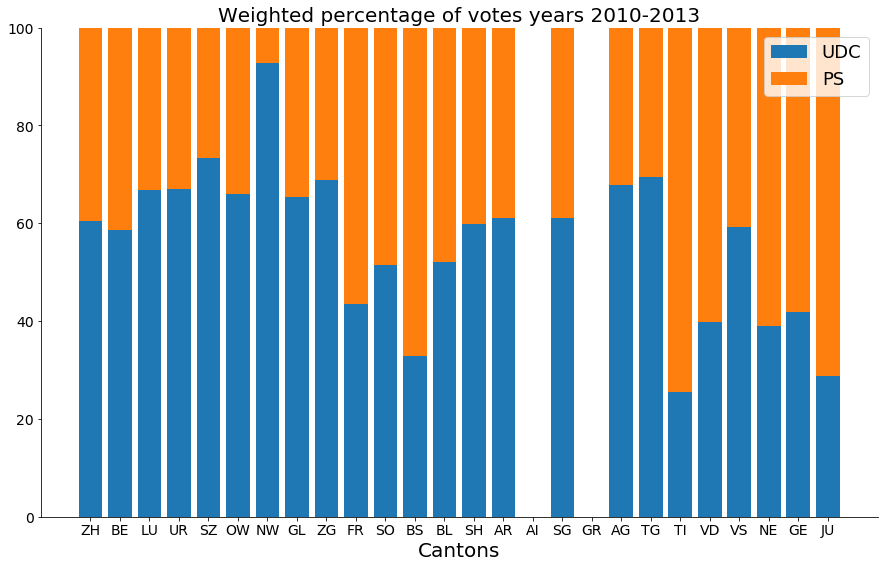

In [40]:
df = voters_df_2010_2013
title = 'Weighted percentage of votes years 2010-2013'
cantons = df['canton'].values
UDC = (df['UDC'].values/(df['UDC'].values+df['PS'].values))*100
PS = (df['PS'].values/(df['UDC'].values+df['PS'].values))*100
# plot
plt.figure(figsize=(15, 9))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
ax.set_ylim(0, 100)
barWidth = 0.85
names = []
for canton in voters_df_2010_2013['canton'].values:
    names.append(canton)
#
plt.bar(np.arange(len(cantons)), UDC, label='UDC')
plt.bar(np.arange(len(cantons)), PS, bottom=UDC, label='PS')

# Custom x axis
plt.xlabel("Cantons", fontsize=20)
plt.xticks(np.arange(len(cantons)),cantons)
plt.legend(loc='upper right', fontsize=18)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.title(title, fontsize=20)

# Show graphic
plt.show()

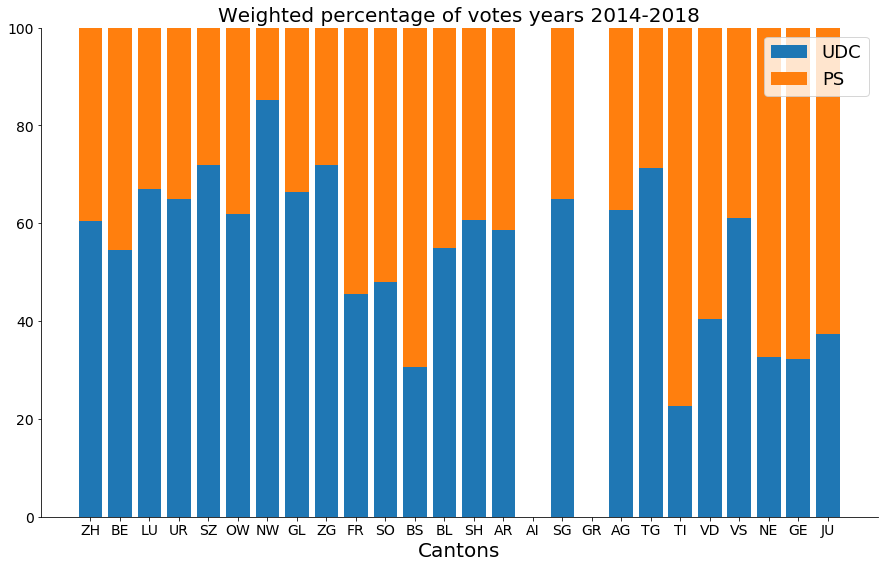

In [41]:
df = voters_df_2014_2018
title = 'Weighted percentage of votes years 2014-2018'
cantons = df['canton'].values
UDC = (df['UDC'].values/(df['UDC'].values+df['PS'].values))*100
PS = (df['PS'].values/(df['UDC'].values+df['PS'].values))*100
# plot
plt.figure(figsize=(15, 9))
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
ax.set_ylim(0, 100)
barWidth = 0.85
names = []
for canton in voters_df_2010_2013['canton'].values:
    names.append(canton)
#
plt.bar(np.arange(len(cantons)), UDC, label='UDC')
plt.bar(np.arange(len(cantons)), PS, bottom=UDC, label='PS')

# Custom x axis
plt.xlabel("Cantons", fontsize=20)
plt.xticks(np.arange(len(cantons)),cantons)
plt.legend(loc='upper right', fontsize=18)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.title(title, fontsize=20)

# Show graphic
plt.show()